In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [14]:
df=pd.read_csv("StudentsPerformance.csv")

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
#Removing space in column names with "_"
column_names=df.columns
for colName in column_names:
    newName=colName.replace(" ","_")
    df.rename(columns={colName:newName},inplace=True)
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

# 1. Find out how many males and females participated in the test.

In [18]:
print("No. of males and females participated in the test")
df["gender"].value_counts().sort_values()

No. of males and females participated in the test


male      482
female    518
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?

Standard Deviation: 65.65871356238003
Median: 187.5


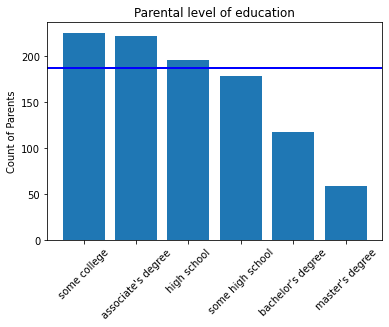

In [21]:
parentLevel=df["parental_level_of_education"].value_counts()
name=parentLevel.index
parent_df=pd.DataFrame(parentLevel).reset_index()
parent_df.columns=["level_of_education","Count"]
f=statistics.median(parent_df["Count"])
fig, ax = plt.subplots()
ax.bar(parent_df["level_of_education"],height=parent_df["Count"])
ax.axhline(parent_df["Count"].median(), color='blue', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Count of Parents")
plt.title("Parental level of education")
print("Standard Deviation:",str(statistics.stdev(parent_df["Count"])))
print("Median:",str(parent_df["Count"].median()))

# 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [30]:
df_avg_score=df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].mean()
df_avg_score['avgCol'] = (df_avg_score['math_score'] + df_avg_score['reading_score']+df_avg_score['writing_score'] )/3
df_avg_score

C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_8308\4248089739.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg_score=df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].mean()


math_score  reading_score  writing_score  \
gender test_preparation_course                                             
female completed                 67.108696      77.375000      78.793478   
       none                      61.320359      69.955090      68.982036   
male   completed                 72.988506      70.793103      70.339080   
       none                      66.467532      62.581169      59.551948   

                                   avgCol  
gender test_preparation_course             
female completed                74.425725  
       none                     66.752495  
male   completed                71.373563  
       none                     62.866883

Note: Female scores the Most on average for math, reading and writing 

# 4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [32]:
df_avg_score=df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].std()/df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].mean()
df_avg_score

C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_8308\2441698238.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg_score=df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].std()/df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].mean()
C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_8308\2441698238.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg_score=df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].std()/df.groupby(['gender', 'test_preparation_course'])['math_score', 'reading_score', 'writing_score'].mean()


math_score  reading_score  writing_score
gender test_preparation_course                                          
female completed                  0.214998       0.164077       0.155353
       none                       0.269253       0.209234       0.217687
male   completed                  0.192348       0.192285       0.183225
       none                       0.215680       0.217249       0.226160

Remarks:
Considering the Coefficient of variation, we can conclude that
    1. spread of data values is low relative to the mean
    2. For Math score,Male who completed the test course have less standard deviation from the average compared to females 
    3. For Reading & Writing score, Females who has completed the course have less standard deviation from the average
    4. Those who completed the test preparation course were able to score better


# The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
    to achieve this.

In [33]:
df.index
count_Top=int((25*1000)/100)
df_bonus=df[["gender","race/ethnicity","math_score"]]
sorted_df=df_bonus.sort_values(by="math_score",ascending=False)
print("top 25% of students based on their maths score")
sorted_df[0:25]

top 25% of students based on their maths score


,gender,race/ethnicity,math_score
999,male,group E,100
996,male,group A,100
515,female,group E,100
517,female,group E,100
516,female,group E,100
997,male,group D,100
998,male,group E,100
995,male,group E,99
513,female,group E,99
514,female,group E,99
